In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [27]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## NCs related to this notebook

    OmA_2015_new.nc


In [3]:
OmA = nc.Dataset('OmA_2015_new.nc')
PI_omA = OmA['model_output']['OmAr_pi']
BR_omA = OmA['model_output']['OmAr_br']

tmask = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')['tmask'][0]
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
zlevels = (t_nc['deptht'][:])



In [4]:
thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

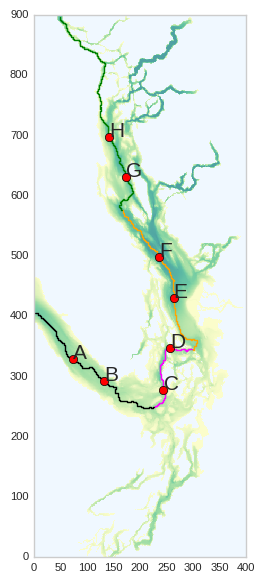

In [13]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
t_cmap = cm.cm.deep

fig = plt.figure(figsize=(4,7))
nop = 1
for i in range(1,nop+1):
    
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        cmap = t_cmap
        tplt = np.ma.masked_values(bath1,0)
        ax.set_title('',fontsize = 20 )
        v_min = 0
        v_max = 1000
        clabel = 'cl1'

        viz_tools.set_aspect(ax)
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
        #       
        ax.plot(thalweg_pts[0:400, 1],thalweg_pts[0:400, 0],'k-')
        ax.plot(thalweg_pts[400:600, 1],thalweg_pts[400:600, 0],color='fuchsia',linestyle='-')
        ax.plot(thalweg_pts[600:1000, 1],thalweg_pts[600:1000, 0],color='orange',linestyle='-')
        ax.plot(thalweg_pts[1000:1533, 1],thalweg_pts[1000:1533, 0],color='green',linestyle='-')

        tpoints = [150,250,450,550,750,850,1100,1200]
        labels = ['A','B','C','D','E','F','G','H']
        for i in range(0,len(tpoints)):
            ttp = tpoints[i]
            ax.plot(thalweg_pts[ttp,1],thalweg_pts[ttp,0],marker = 'o',color = 'red')
            ax.text(thalweg_pts[ttp,1]+0.2,thalweg_pts[ttp,0]+0.2,labels[i], fontsize = 15)

        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        cmap.set_bad('aliceblue')

In [42]:
i = 0
tpoints = [150,250,450,550,750,850,1100,1200]
labels = ['A','B','C','D','E','F','G','H']


In [43]:
fwk = nc.Dataset('/data/tjarniko/results/RFPARTY/rfncs/SKOG_1d_20181213_20190101_ptrc_T_20190101-20190101.nc')
zlevels = (fwk['deptht'][:])

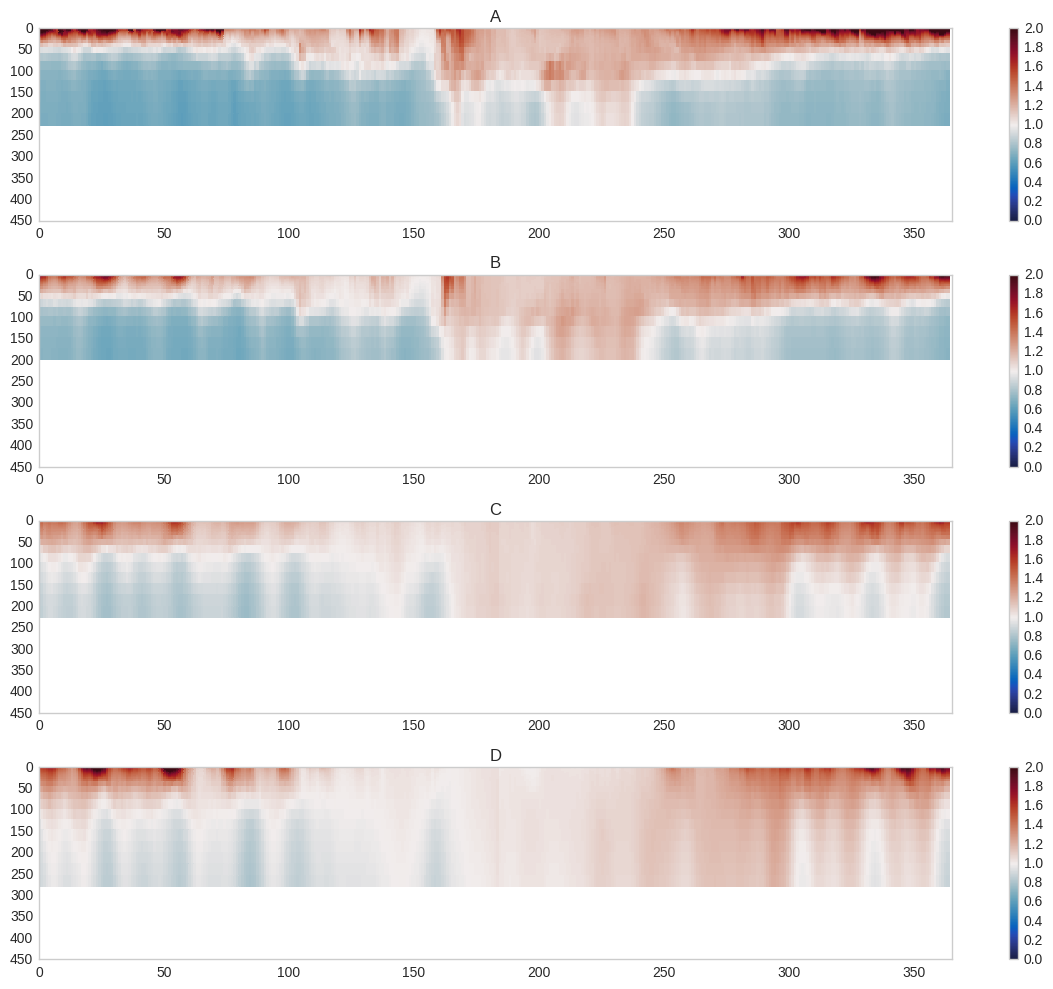

In [49]:
fig = plt.figure(figsize=(12,10))

for i in range(1,9):
    if i == 1:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i-1]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i-1])

    if i == 2:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i-1]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i-1])
        
    if i == 3:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i-1]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i-1])
        
        
    if i == 4:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i-1]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i-1])
        
    ax.set_xlim([0,365])

plt.tight_layout()

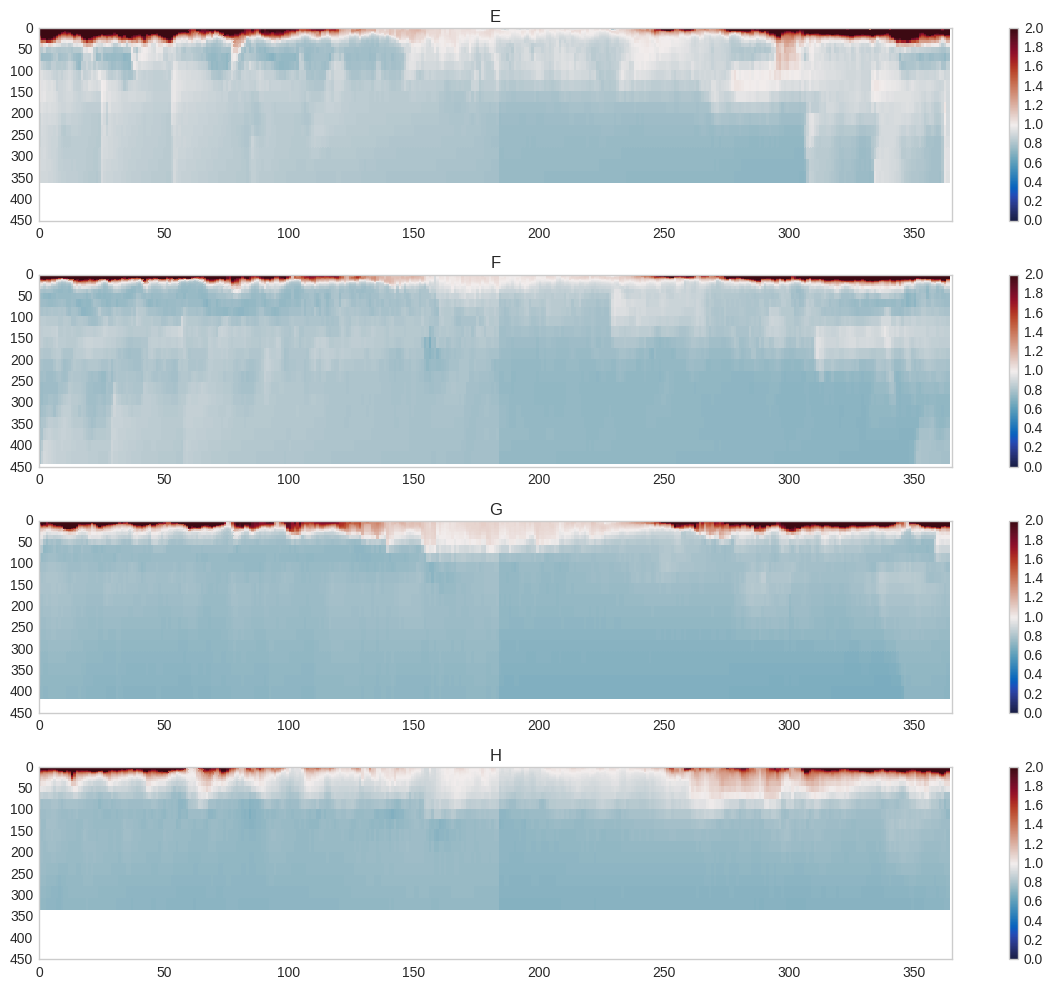

In [50]:
fig = plt.figure(figsize=(12,10))

for i in range(1,9):
    if i == 1:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])

    if i == 2:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
    if i == 3:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
        
    if i == 4:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
    ax.set_xlim([0,365])
plt.tight_layout()

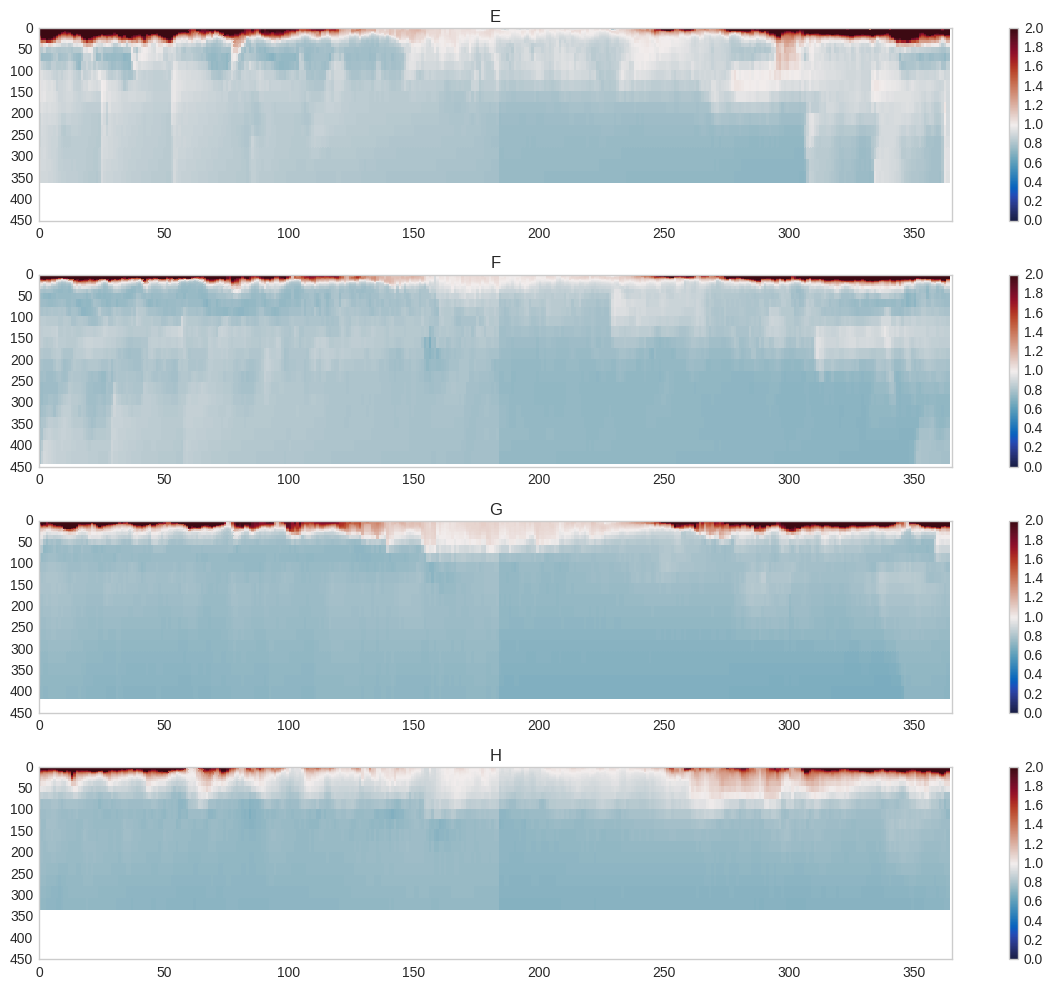

In [57]:
fig = plt.figure(figsize=(12,10))

for i in range(1,9):
    if i == 1:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])

    if i == 2:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
    if i == 3:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
        
    if i == 4:
        ax = fig.add_subplot(4,1,i)
        ttp = tpoints[i+3]
        t_x = thalweg_pts[ttp,1]
        t_y = thalweg_pts[ttp,0]
        station_yearly_profile = BR_omA[:,:,t_y,t_x]
        syp = np.transpose(station_yearly_profile)
        tslice = np.arange(0,365,1)
        ax.invert_yaxis()
        mesh = ax.pcolormesh(tslice, zlevels, syp, cmap=t_cmap, vmin=0, vmax=2)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.set_title(labels[i+3])
        
    ax.set_xlim([0,365])

    #ax.set_ylim([0,60])
plt.tight_layout()